# https://www.kaggle.com/arshid/iris-flower-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv('IRis.csv')
target = 'species'

In [3]:
data.shape

(150, 5)

In [4]:
data.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<AxesSubplot:>

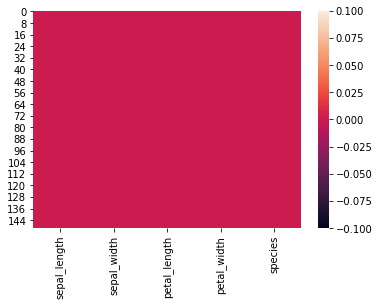

In [6]:
sns.heatmap(data.isna())

In [7]:
data[target].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

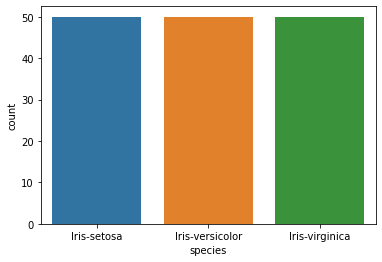

In [8]:
sns.countplot(x=data[target])

In [66]:
# data[target].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='None'>

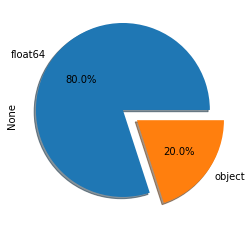

In [99]:
data.dtypes.value_counts().plot.pie(autopct='%1.1f%%',explode=[0.1,0.1],shadow=True)

<AxesSubplot:ylabel='species'>

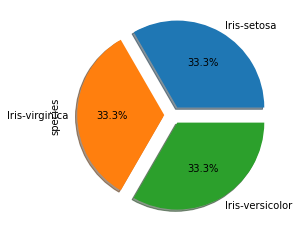

In [107]:
data[target].value_counts().plot.pie(autopct='%1.1f%%',explode=[0.1,0.1,0.1],shadow=True)

In [9]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
X = data.drop(target,1)
y = data[target]

<AxesSubplot:>

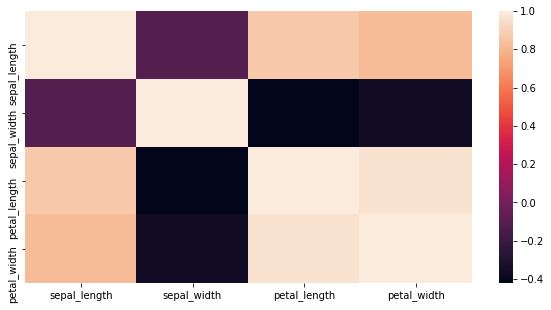

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(data=data.drop(target,1).corr())

# check for outliers

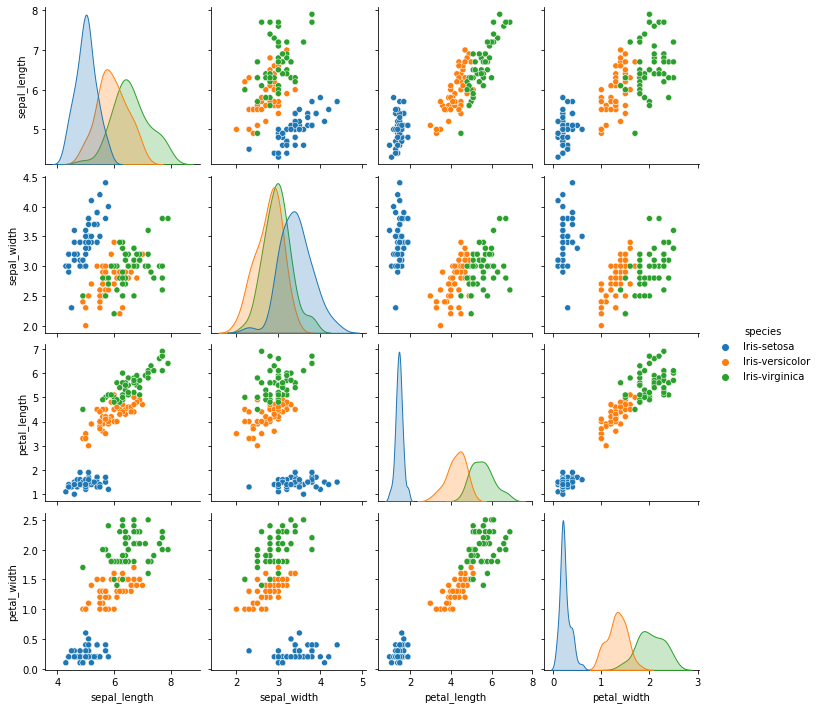

In [41]:
sns.pairplot(data,hue=target)

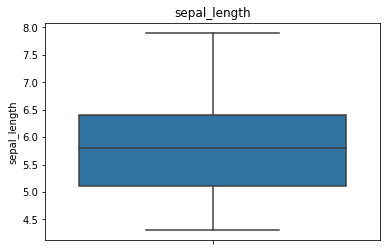

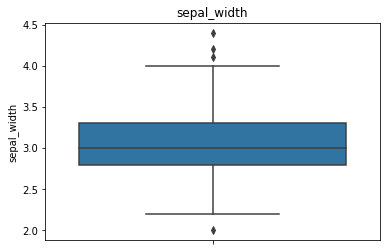

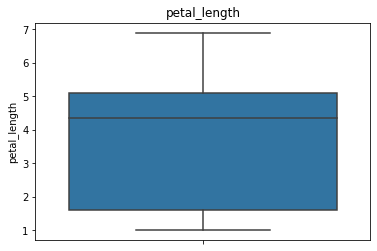

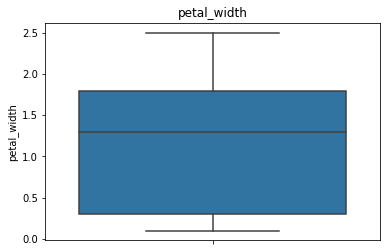

In [13]:
for i in X.columns:
    df = data.copy()
    sns.boxplot(data=df,y=i)
    plt.title(i)
    plt.ylabel(i)
    plt.show()


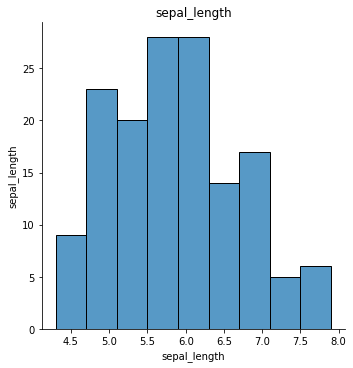

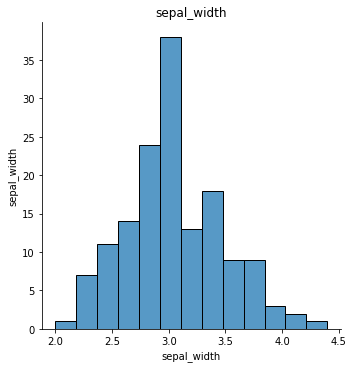

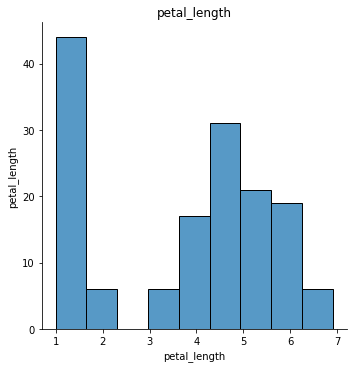

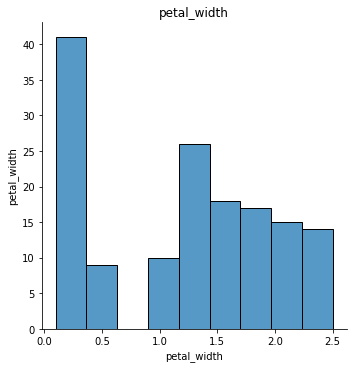

In [14]:
for i in X.columns:
    df = data.copy()
    sns.displot(data=df,x=i)
    plt.title(i)
    plt.ylabel(i)
    plt.show()


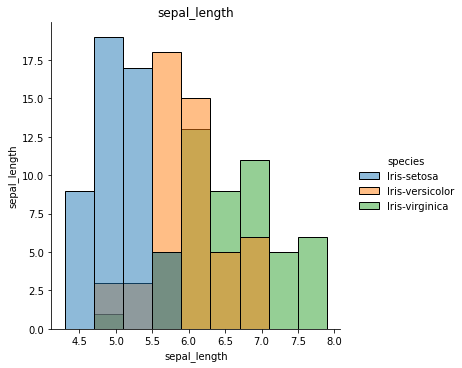

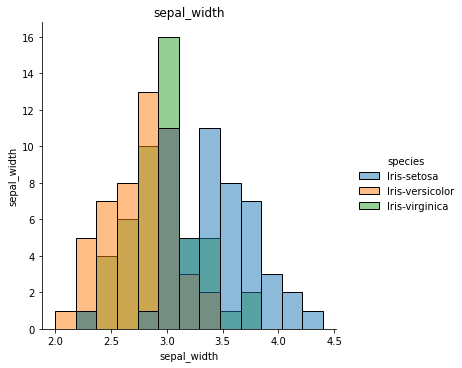

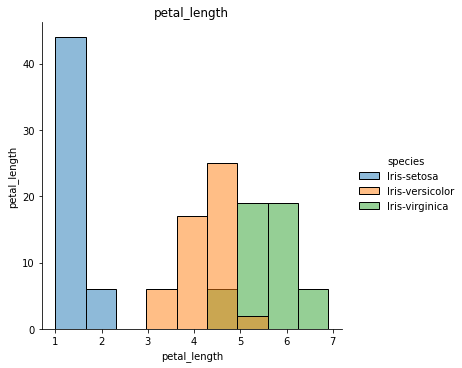

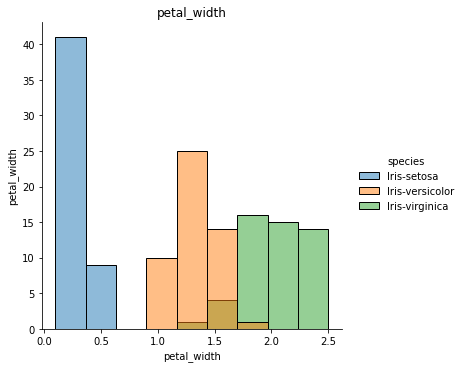

In [15]:
for i in X.columns:
    df = data.copy()
    sns.displot(data=df,x=i,hue=target)
    plt.title(i)
    plt.ylabel(i)
    plt.show()


# model training

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [17]:
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state=26,test_size=.25)

In [45]:
scores = {}
error_rate = []
for i in range(2,21):
    model = KNeighborsClassifier(i)
    model.fit(train_x,train_y)
    score = model.score(train_x,train_y)
    pred_i = model.predict(test_x)
    scores[i] = score
    error_rate.append(np.mean(pred_i != test_y))
scores

{2: 0.9732142857142857,
 3: 0.9732142857142857,
 4: 0.9732142857142857,
 5: 0.9821428571428571,
 6: 0.9910714285714286,
 7: 0.9732142857142857,
 8: 0.9910714285714286,
 9: 0.9821428571428571,
 10: 0.9821428571428571,
 11: 0.9732142857142857,
 12: 0.9821428571428571,
 13: 0.9821428571428571,
 14: 0.9910714285714286,
 15: 0.9732142857142857,
 16: 0.9821428571428571,
 17: 0.9821428571428571,
 18: 0.9821428571428571,
 19: 0.9821428571428571,
 20: 0.9821428571428571}

Text(0, 0.5, 'Error Rate')

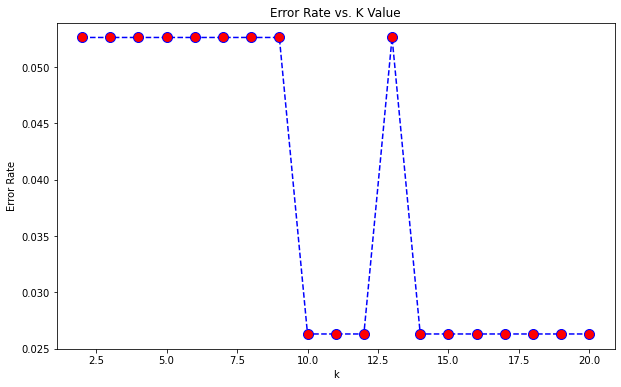

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(2,21),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('k')
plt.ylabel('Error Rate')

In [46]:
scores = {}
error_rate = []
inertia = []
for i in range(2,21):
    model = KMeans(i)
    model.fit(train_x,train_y)
    score = model.score(train_x,train_y)
    pred_i = model.predict(test_x)
    scores[i] = score
    error_rate.append(np.mean(pred_i != test_y))
    inertia.append(model.inertia_)


{2: -107.65652265542671,
 3: -57.56933808808809,
 4: -40.49659073359074,
 5: -33.424764312699814,
 6: -28.22324542539144,
 7: -24.61223201944255,
 8: -21.79044229446164,
 9: -20.188356792717084,
 10: -18.92122263993317,
 11: -17.518565476190467,
 12: -16.47410093167701,
 13: -15.565574866310163,
 14: -14.075791181041184,
 15: -13.398837301587303,
 16: -13.133198412698412,
 17: -12.044042124542127,
 18: -11.358785714285709,
 19: -10.845500000000001,
 20: -10.36796753246753}

Text(0, 0.5, 'Error Rate')

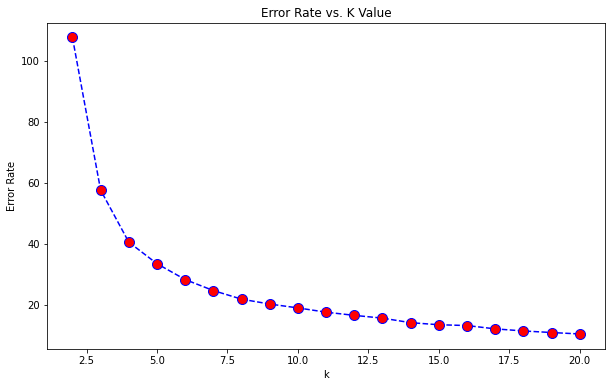

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(2,21),inertia,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('k')
plt.ylabel('Error Rate')

In [20]:
model = KNeighborsClassifier(6)
model.fit(train_x,train_y)
score = model.score(train_x,train_y)

In [48]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
models = [KNeighborsClassifier(6),LogisticRegression(),DecisionTreeClassifier(),SVC(),GaussianNB()]
scores = {}
for model in models:
    model.fit(train_x,train_y)
    pred = model.predict(test_x)
    a_score = accuracy_score(test_y,pred)
    scores[model]  = a_score
    

In [51]:
scores

{KNeighborsClassifier(n_neighbors=6): 0.9473684210526315,
 LogisticRegression(): 0.9736842105263158,
 DecisionTreeClassifier(): 0.9736842105263158,
 SVC(): 0.9736842105263158,
 GaussianNB(): 0.9736842105263158,
 KMeans(n_clusters=3): 0.0}

In [50]:
model=SVC()
model.fit(train_x,train_y)
pred = model.predict(test_x)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_y,pred))
cm = confusion_matrix(test_y,pred)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



<AxesSubplot:>

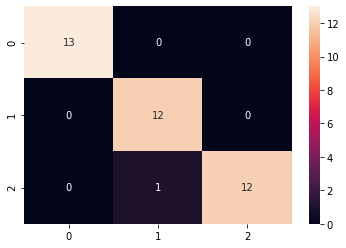

In [25]:
sns.heatmap(cm, annot=True)

# further engineering

In [26]:
data2 = data.copy()

In [27]:
X = data2.drop(target,1)
y = data2[target]

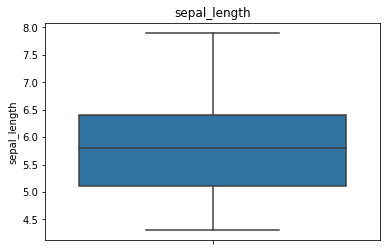

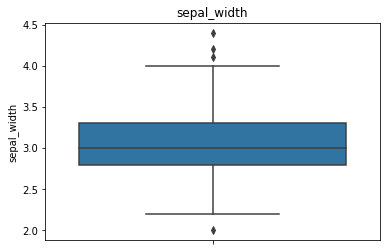

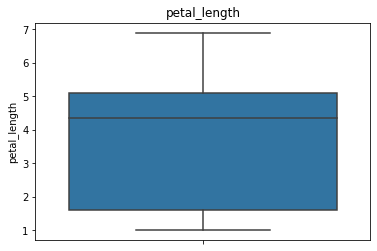

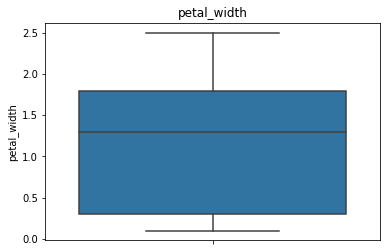

In [28]:
for i in X.columns:
    df = data2.copy()
    sns.boxplot(data=df,y=i)
    plt.title(i)
    plt.ylabel(i)
    plt.show()


In [29]:
data2.sepal_width.describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

In [30]:
min_sep = data2['sepal_width'].quantile(.25) - data['sepal_width'].std()

In [31]:
max_sep = data2['sepal_width'].quantile(.75) + data['sepal_width'].std()

In [32]:
data2['sepal_width'] = data2[data.sepal_width > min_sep]

In [33]:
#data['sepal_width'] = data[data.sepal_width < max_sep]

In [34]:
data2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,5.1,1.4,0.2,Iris-setosa
1,4.9,4.9,1.4,0.2,Iris-setosa
2,4.7,4.7,1.3,0.2,Iris-setosa
3,4.6,4.6,1.5,0.2,Iris-setosa
4,5.0,5.0,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,6.7,5.2,2.3,Iris-virginica
146,6.3,6.3,5.0,1.9,Iris-virginica
147,6.5,6.5,5.2,2.0,Iris-virginica
148,6.2,6.2,5.4,2.3,Iris-virginica


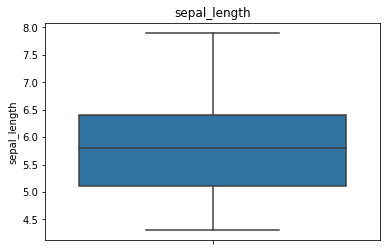

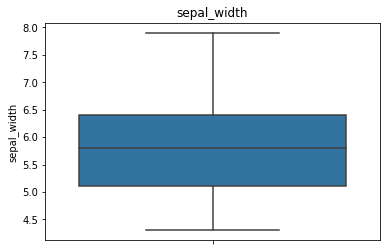

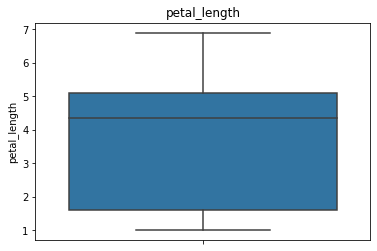

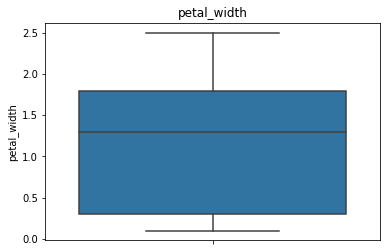

In [35]:
for i in X.columns:
    df = data2.copy()
    sns.boxplot(data=df,y=i)
    plt.title(i)
    plt.ylabel(i)
    plt.show()


In [36]:
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state=26,test_size=.25)

In [37]:
model=SVC()
model.fit(train_x,train_y)
pred = model.predict(test_x)

In [38]:
print(classification_report(test_y,pred))
cm = confusion_matrix(test_y,pred)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



<AxesSubplot:>

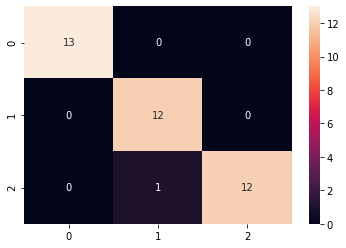

In [39]:
sns.heatmap(cm, annot=True)